# Importing the Libraries needed

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

## Loading the dataset

In [427]:
df = pd.read_csv('./data/AviationData.csv',encoding='latin1')
us_codes = pd.read_csv('data/USState_Codes.csv')

C:\Users\Johny\AppData\Local\Temp\ipykernel_18276\3654224774.py:1: DtypeWarning:

Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.



In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Inspection of the dataset

In [429]:
# Initial inspection
print(df.info())
print(df.describe())
print(df.head())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

(88889, 31)

## Features of our dataset 
- Our data comprises of 88889 rows and 30 columns.
- The dataset is of mixed dtypes such as datetime64[ns](1), float64(7), int32(1), object(24)
- Quite a number of columns have missing values denoted either as nan or as None


We will try and find the total number of missing values per column and compute the percentages for easy viewing.

In [393]:
#Percentage of missing values in the dataframe
percentage_missing =  round(df.isnull().sum() * 100 / len(df), 2)
#sorting the percentage of missing values in descending order
sorted_percentage_missing = percentage_missing.sort_values(ascending=False)
#preview the sorted dataframe
sorted_percentage_missing

Schedule                  85.85
Air.carrier               81.27
FAR.Description           63.97
Aircraft.Category         63.68
Longitude                 61.33
Latitude                  61.32
Airport.Code              43.60
Airport.Name              40.71
Broad.phase.of.flight     30.56
Publication.Date          15.49
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Total.Fatal.Injuries      12.83
Engine.Type                7.98
Report.Status              7.18
Purpose.of.flight          6.97
Number.of.Engines          6.84
Total.Uninjured            6.65
Weather.Condition          5.05
Aircraft.damage            3.59
Registration.Number        1.55
Injury.Severity            1.12
Country                    0.25
Amateur.Built              0.11
Model                      0.10
Make                       0.07
Location                   0.06
Investigation.Type         0.00
Event.Date                 0.00
Accident.Number            0.00
Event.Id                   0.00
dtype: f

## Plotting the missing values

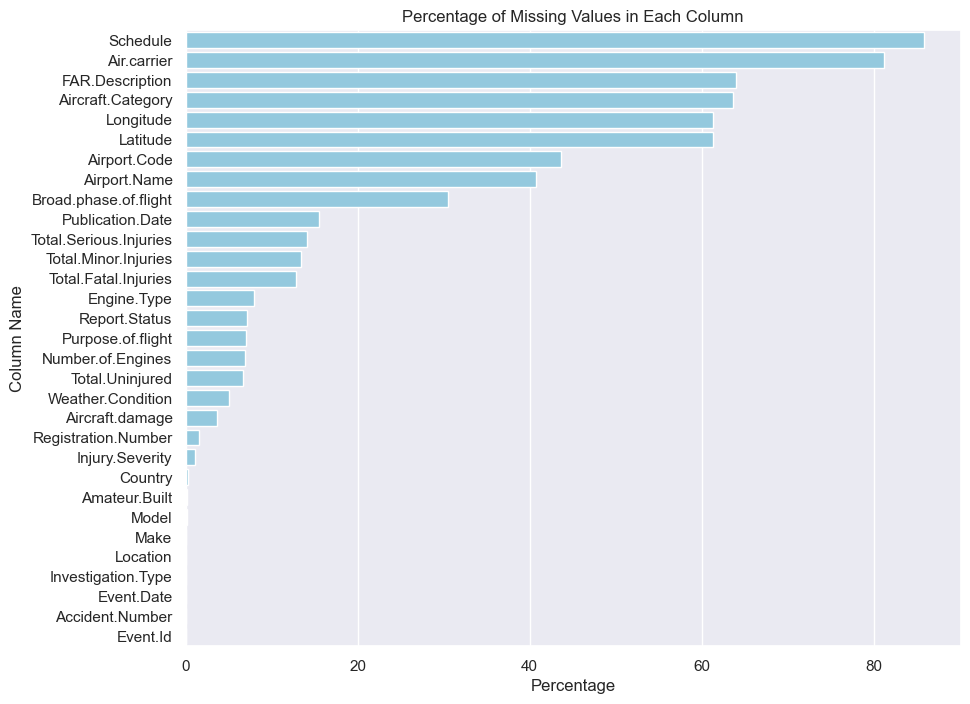

In [423]:
#Plotting the percentage of missing values in each column
#setting the style of the plot
sns.set_style('darkgrid')
#setting the size of the plot
fig, ax = plt.subplots(figsize=(10, 8))

#plotting the percentage of missing values in each column a horizontal bar plot
sns.barplot(x=sorted_percentage_missing.values, y=sorted_percentage_missing.index, color='skyblue', orient='h')
#setting the title and axis labels of the plot
ax.set_title('Percentage of Missing Values in Each Column')
ax.set_ylabel('Column Name')
ax.set_xlabel('Percentage');

# Handling the missing values
We will drop the columns with missing values amounting to 60% of the total dataset

In [430]:
# Handle missing values
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode().iloc[0]) # I replaced it with the mode instead of the mean because the data is categorical
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown').replace({'NONE':'Unknown'})
 # Convert latitude/longitude to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
# Convert date column
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Airport.Name'] = df['Airport.Name'].fillna('Unkown')
df['Airport.Name'] = df['Airport.Name'].map(lambda x: x.strip().title())
# Create year column
df['Year'] = df['Event.Date'].dt.year
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')



In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            88889 non-null  object        
 10  Injury.Severity         88889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       88889 non-null  object

In [397]:
df['Injury.Severity'].isna().sum()

0

## Filtering te data

Since we are looking at flight risk operations in the US. We need to filter our data and match the state codes to their respective names in the US

In [398]:
# Convert the US cities to States/territories
df_us = df[df['Country'] == 'United States']

# converting the states to a dictionary for reading in the states
states = dict(zip(us_codes['Abbreviation'],us_codes['US_State']))

# Function to clean the location column and just get the US territories converted to US States
def clean_location(loc):
    loc = str(loc)  # Ensuring that the location is a string
    match = re.match(r'^(.*?),\s*([A-Z]{2})$', loc)  # Extracts the prefix and suffix
    if match:
        city, code = match.groups()  # Split the location into city and state code
        if code in states:  # Check if the suffix is a valid state abbreviation
            return states[code]  # Return only the full state name
        else:
            return city.strip()  # If suffix is invalid, return only the city (prefix)
    return loc  # Return the location as-is if no match

In [399]:
# Apply the function to clean the 'Location' column and drop the columns with NAs
df['US_territories'] = df['Location'].apply(clean_location)

In [400]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year', 'US_territories'],
      dtype='object')

In [401]:
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
df[injury_cols]=df[injury_cols].fillna(0)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,US_territories
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,Unkown,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,Unkown,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Unkown,...,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,Virginia
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,Unkown,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,California
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,Unkown,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,Ohio


In [402]:
df['Airport.Name']

0        Unkown
1        Unkown
2        Unkown
3        Unkown
4        Unkown
          ...  
88884    Unkown
88885    Unkown
88886    Payson
88887    Unkown
88888    Unkown
Name: Airport.Name, Length: 88889, dtype: object

**Here we remove all unnecessary columns and also the columns with NANs greater than 60%.**
The reason we are choosing these columns is because;
1. We want to find the best aircraft make that has the lowest risk.
2. The aircraft involved in the least amount of accidents

In [403]:
# Filter relevant columns
cols = ['Event.Id', 'Investigation.Type', 'Aircraft.Category', 'Make', 'Model','Airport.Name',
        'Number.of.Engines', 'Engine.Type', 'Year', 'Injury.Severity','US_territories',
        'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Broad.phase.of.flight',
        'Total.Minor.Injuries']

df_clean = df[cols].copy()

# Handle injury data
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
df_clean[injury_cols] = df_clean[injury_cols].fillna(0)

In [404]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Aircraft.Category       88889 non-null  object 
 3   Make                    88889 non-null  object 
 4   Model                   88889 non-null  object 
 5   Airport.Name            88889 non-null  object 
 6   Number.of.Engines       88889 non-null  float64
 7   Engine.Type             88889 non-null  object 
 8   Year                    88889 non-null  int32  
 9   Injury.Severity         88889 non-null  object 
 10  US_territories          88889 non-null  object 
 11  Total.Fatal.Injuries    88889 non-null  float64
 12  Total.Serious.Injuries  88889 non-null  float64
 13  Broad.phase.of.flight   88889 non-null  object 
 14  Total.Minor.Injuries    88889 non-null

Component	Weight	Meaning
- Average fatalities	0.4	Heaviest weight — deadlier = riskier
- Average serious injuries	0.3	Bad but less severe than fatalities
- Time since last accident	0.2	Newer = higher risk (because (2023 - year) is smaller)
- Total number of accidents	0.1	Minor weight — high count = slightly riskier

In [405]:
# Calculate key safety metrics
safety_metrics = df_clean.groupby(['Make', 'Model']).agg(
    total_accidents=('Event.Id', 'count'),
    avg_fatalities=('Total.Fatal.Injuries', 'mean'),
    injury_rate=('Total.Serious.Injuries', 'mean'),
    engine_type=('Engine.Type', pd.Series.mode),
    category=('Aircraft.Category', pd.Series.mode),
    recent_accident_year=('Year', 'max'),
    common_phase=('Broad.phase.of.flight', pd.Series.mode),
    total_engines=('Number.of.Engines', 'mean')
).reset_index()

# Filter for sufficient data points (minimum 10 accidents)
safety_metrics = safety_metrics[safety_metrics['total_accidents'] >= 10]

# Calculate weighted risk score using customized weights as needed)
safety_metrics['risk_score'] = (
    (safety_metrics['avg_fatalities'] * 0.4) +
    (safety_metrics['injury_rate'] * 0.3) +
    ((2023 - safety_metrics['recent_accident_year']) * 0.2) +  
    (safety_metrics['total_accidents'] * 0.1)
)

# Ranking all the aircraft
safety_metrics['safety_rank'] = safety_metrics['risk_score'].rank(ascending=True)

# Get top 10 safest aircraft
safest_aircraft = safety_metrics.sort_values('safety_rank')[
    ['Make', 'Model', 'engine_type', 'category', 'common_phase',
     'total_accidents', 'avg_fatalities', 'safety_rank']
].head(10)

print("Top 10 Safest Aircraft Models:")
print(safest_aircraft)

Top 10 Safest Aircraft Models:
                                Make          Model    engine_type  \
16956        SCHWEIZER AIRCRAFT CORP         G-164B     Turbo Prop   
9197                           GLOBE          GC-1B  Reciprocating   
5378   CONSOLIDATED AERONAUTICS INC.  LAKE LA-4-200  Reciprocating   
10199                         HUGHES          369HS    Turbo Shaft   
12371                          MAULE       M-5-235C  Reciprocating   
14385                          PIPER     PA-28R-201  Reciprocating   
5102                          CESSNA          A185E  Reciprocating   
2248                        BELLANCA          7KCAB  Reciprocating   
5498         CZECH SPORT AIRCRAFT AS    PIPER SPORT  Reciprocating   
605               AVIAT AIRCRAFT INC       A-1C-180  Reciprocating   

         category common_phase  total_accidents  avg_fatalities  safety_rank  
16956    Airplane      Unknown               10        0.000000          1.0  
9197     Airplane      Unknown          

In [406]:
# Looking at the trends of the Model accidents over time
list_safest_aircraft = safest_aircraft["Make"]
df_top_10 = df_clean[df_clean['Make'].isin(list_safest_aircraft)]


make_yr_df = df_top_10.groupby(['Year','Make'])['Event.Id'].count().reset_index()
make_yr_df.rename(columns={'Event.Id':'Accident count'},inplace=True)
make_yr_df = make_yr_df.sort_values(by='Accident count', ascending=False)
make_yr_df

,Year,Make,Accident count
25,2011,CESSNA,437
16,2010,CESSNA,425
78,2017,CESSNA,404
8,2009,CESSNA,399
34,2012,CESSNA,398
...,...,...,...
50,2014,CZECH SPORT AIRCRAFT AS,1
93,2018,SCHWEIZER AIRCRAFT CORP,1
96,2019,GLOBE,1
97,2019,HUGHES,1


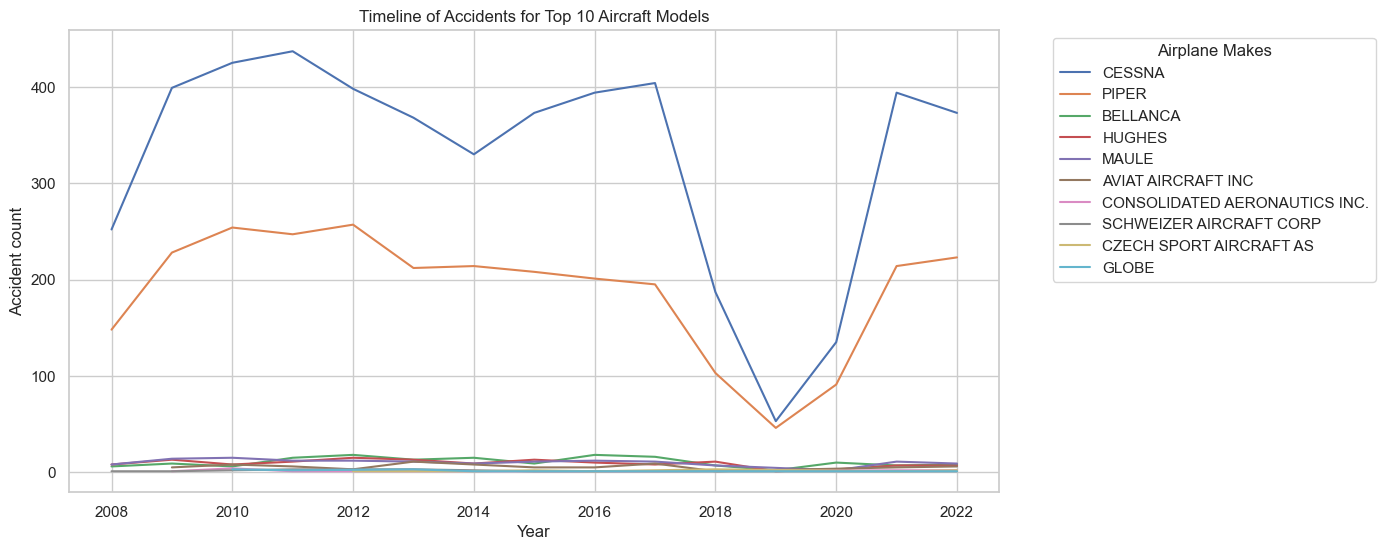

In [407]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=make_yr_df, x='Year', y='Accident count', hue='Make', legend=True)
plt.title('Timeline of Accidents for Top 10 Aircraft Models')
plt.xlabel('Year')
plt.legend(title='Airplane Makes',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Accident count')
plt.show()

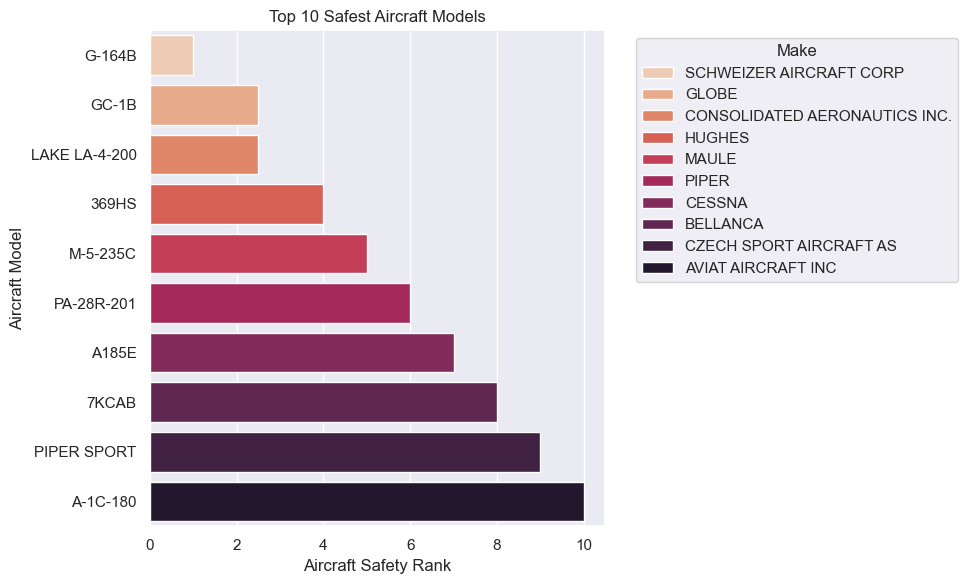

In [408]:
# Set the style
sns.set(style="darkgrid")

# Sort by safety rank (just to be sure)
plot_data = safest_aircraft.sort_values('safety_rank')

# Create a horizontal barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='safety_rank',
    y='Model',
    data=plot_data,
    hue='Make',
    dodge=False,
    palette='rocket_r'
)

# Adding labels and title
plt.xlabel('Aircraft Safety Rank')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Safest Aircraft Models')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


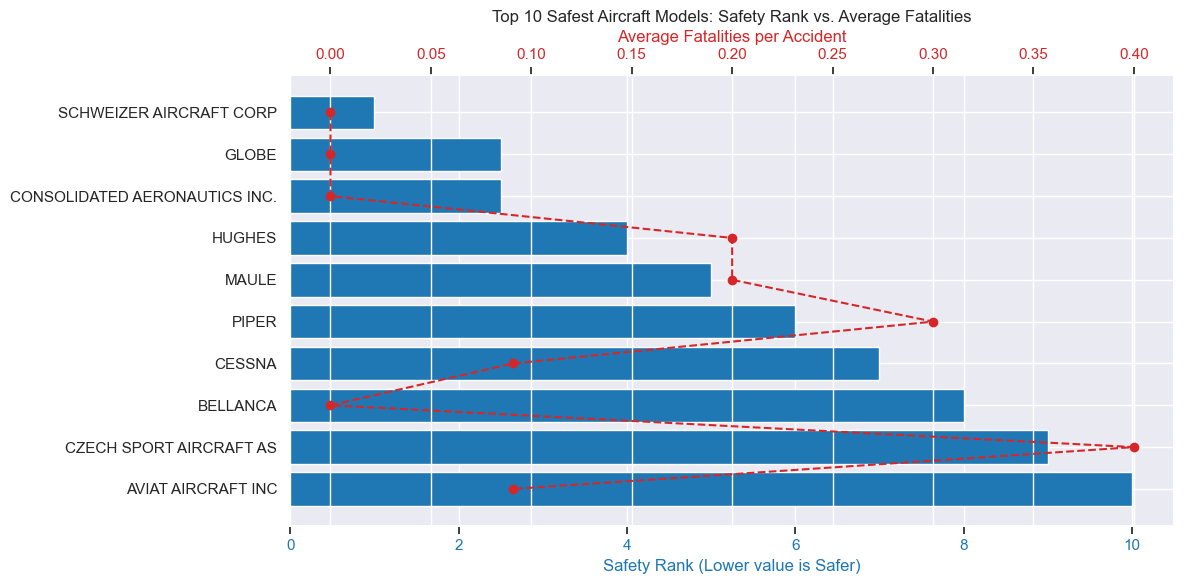

In [409]:

# Sort data for consistent plotting
plot_data = safest_aircraft.sort_values('safety_rank')

# Set figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set up colors
color1 = 'tab:blue'
color2 = 'tab:red'

# Bar plot for Safety Rank
ax1.barh(plot_data['Make'], plot_data['safety_rank'], color=color1, label='Safety Rank')
ax1.set_xlabel('Safety Rank (Lower value is Safer)', color=color1)
ax1.tick_params(axis='x', labelcolor=color1)
ax1.invert_yaxis()  # So the safest (rank 1) is on top

# Create second axis sharing the same y-axis
ax2 = ax1.twiny() # Causes the ax2 to share the same x and y axes
ax2.plot(plot_data['avg_fatalities'], plot_data['Make'], color=color2, marker='o', label='Avg Fatalities', linestyle='--')
ax2.set_xlabel('Average Fatalities per Accident', color=color2)
ax2.tick_params(axis='x', labelcolor=color2)

# Title and layout
plt.title('Top 10 Safest Aircraft Models: Safety Rank vs. Average Fatalities')
fig.tight_layout()
plt.show()


In [410]:
# operational risk


In [411]:
df_clean['Airport.Name']

0        Unkown
1        Unkown
2        Unkown
3        Unkown
4        Unkown
          ...  
88884    Unkown
88885    Unkown
88886    Payson
88887    Unkown
88888    Unkown
Name: Airport.Name, Length: 88889, dtype: object

In [412]:
safest_aircraft

,Make,Model,engine_type,category,common_phase,total_accidents,avg_fatalities,safety_rank
16956,SCHWEIZER AIRCRAFT CORP,G-164B,Turbo Prop,Airplane,Unknown,10,0.000000,1.0
9197,GLOBE,GC-1B,Reciprocating,Airplane,Unknown,10,0.000000,2.5
5378,CONSOLIDATED AERONAUTICS INC.,LAKE LA-4-200,Reciprocating,Airplane,Unknown,10,0.000000,2.5
10199,HUGHES,369HS,Turbo Shaft,Helicopter,Unknown,10,0.200000,4.0
12371,MAULE,M-5-235C,Reciprocating,Airplane,Unknown,10,0.200000,5.0
14385,PIPER,PA-28R-201,Reciprocating,Airplane,Unknown,10,0.300000,6.0
5102,CESSNA,A185E,Reciprocating,Airplane,Unknown,11,0.090909,7.0
2248,BELLANCA,7KCAB,Reciprocating,Airplane,Unknown,10,0.000000,8.0
5498,CZECH SPORT AIRCRAFT AS,PIPER SPORT,Reciprocating,Airplane,Unknown,10,0.400000,9.0
605,AVIAT AIRCRAFT INC,A-1C-180,Reciprocating,Airplane,Unknown,11,0.090909,10.0


In [413]:
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Aircraft.Category', 'Make', 'Model',
       'Airport.Name', 'Number.of.Engines', 'Engine.Type', 'Year',
       'Injury.Severity', 'US_territories', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Broad.phase.of.flight',
       'Total.Minor.Injuries'],
      dtype='object')

In [414]:
# Clean Airport Name column: strip extra spaces and replace inconsistent characters
df_clean['Airport.Name'] = df_clean['Airport.Name'].str.strip().str.replace(r'[^\w\s]', '', regex=True)

# Check for duplicates
duplicate_airports = df_clean[df_clean.duplicated(subset=['Airport.Name', 'Broad.phase.of.flight'])]
print(duplicate_airports)

# Check for unique broad phases
print(df_clean['Broad.phase.of.flight'].unique())


             Event.Id Investigation.Type Aircraft.Category  \
2      20061025X01555           Accident           Unknown   
3      20001218X45448           Accident           Unknown   
6      20001218X45446           Accident           Unknown   
10     20020909X01559           Accident           Unknown   
12     20020917X02148           Accident          Airplane   
...               ...                ...               ...   
88884  20221227106491           Accident           Unknown   
88885  20221227106494           Accident           Unknown   
88886  20221227106497           Accident          Airplane   
88887  20221227106498           Accident           Unknown   
88888  20221230106513           Accident           Unknown   

                             Make      Model Airport.Name  Number.of.Engines  \
2                          Cessna       172M       Unkown                1.0   
3                        Rockwell        112       Unkown                1.0   
6              

In [415]:
# Group by 'Broad.phase.of.flight' and count accidents (Event.Id)
cause_accidents = df_clean.groupby('Broad.phase.of.flight')['Event.Id'].count().reset_index()

# Rename 'Event.Id' to 'Accident Count'
cause_accidents.rename(columns={'Event.Id': 'Accident Count'}, inplace=True)

# Sort by accident count to identify the leading causes
cause_accidents_sorted = cause_accidents.sort_values(by='Accident Count', ascending=False)

# Show the top leading causes
cause_accidents_sorted.head(10)  # Top 10 leading causes



,Broad.phase.of.flight,Accident Count
11,Unknown,27713
5,Landing,15428
9,Takeoff,12493
2,Cruise,10269
6,Maneuvering,8144
0,Approach,6546
1,Climb,2034
10,Taxi,1958
3,Descent,1887
4,Go-around,1353


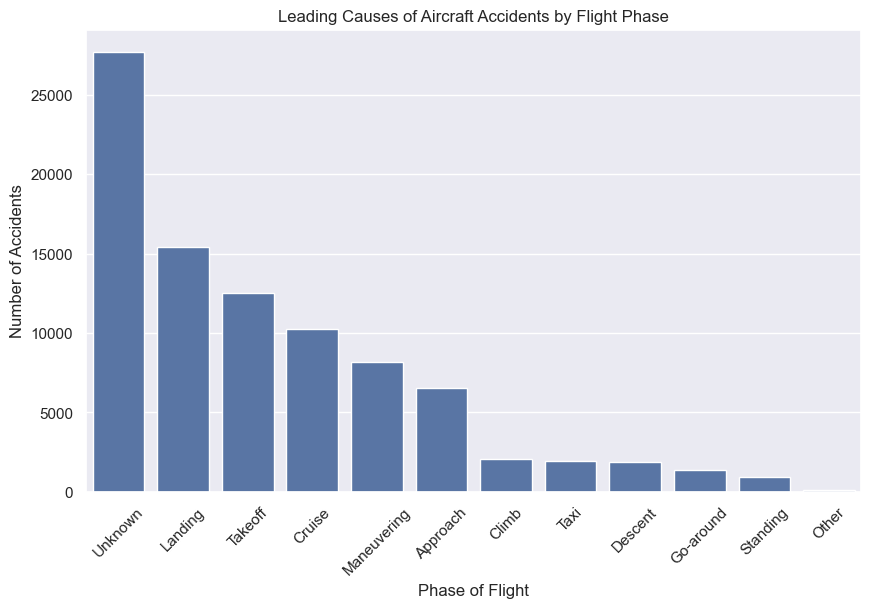

In [416]:

# Bar plot to visualize the leading causes of accidents
plt.figure(figsize=(10,6))
sns.barplot(data=cause_accidents_sorted, x='Broad.phase.of.flight', y='Accident Count')
plt.title('Leading Causes of Aircraft Accidents by Flight Phase')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


In [417]:
make_phase_counts = df_clean.groupby(['Broad.phase.of.flight'])['Event.Id'].count().reset_index()
make_phase_counts.rename(columns={'Event.Id': 'Accident Count'}, inplace=True)
make_phase_counts

,Broad.phase.of.flight,Accident Count
0,Approach,6546
1,Climb,2034
2,Cruise,10269
3,Descent,1887
4,Go-around,1353
5,Landing,15428
6,Maneuvering,8144
7,Other,119
8,Standing,945
9,Takeoff,12493


In [418]:
# Group by 'Airport.Name' and count accidents (Event.Id)
airport_accidents = df_clean.groupby('Airport.Name')['Event.Id'].count().reset_index()

# Rename 'Event.Id' to 'Accident Count'
airport_accidents.rename(columns={'Event.Id': 'Accident Count'}, inplace=True)

# Sort airports by accident count in ascending order to find airports with least accidents
airport_accidents_sorted = airport_accidents.sort_values(by='Accident Count', ascending=True)

# Show the top airports with the least accidents
airport_accidents_sorted.head(10)  # Top 10 airports with least accidents


,Airport.Name,Accident Count
0,,1
12410,Middle Georgia Airpark,1
12411,Middle Georgia Airport,1
12413,Middle Hero,1
12414,Middle Peninsula,1
12415,Middle Peninsula Regional,1
12416,Middle Peninsula Rgnl,1
12417,Middle River,1
12418,Middleboro,1
12419,Middlebury State,1


In [419]:
make_phase_counts = df_clean.groupby(['Broad.phase.of.flight'])['Event.Id'].count().reset_index()